In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("dataset/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv("dataset/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data = all_data.drop(["SalePrice"],axis=1)
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


               Missing%
PoolQC        99.657417
MiscFeature   96.402878
Alley         93.216855
Fence         80.438506
FireplaceQu   48.646797
LotFrontage   16.649538
GarageQual     5.447071
GarageCond     5.447071
GarageFinish   5.447071
GarageYrBlt    5.447071


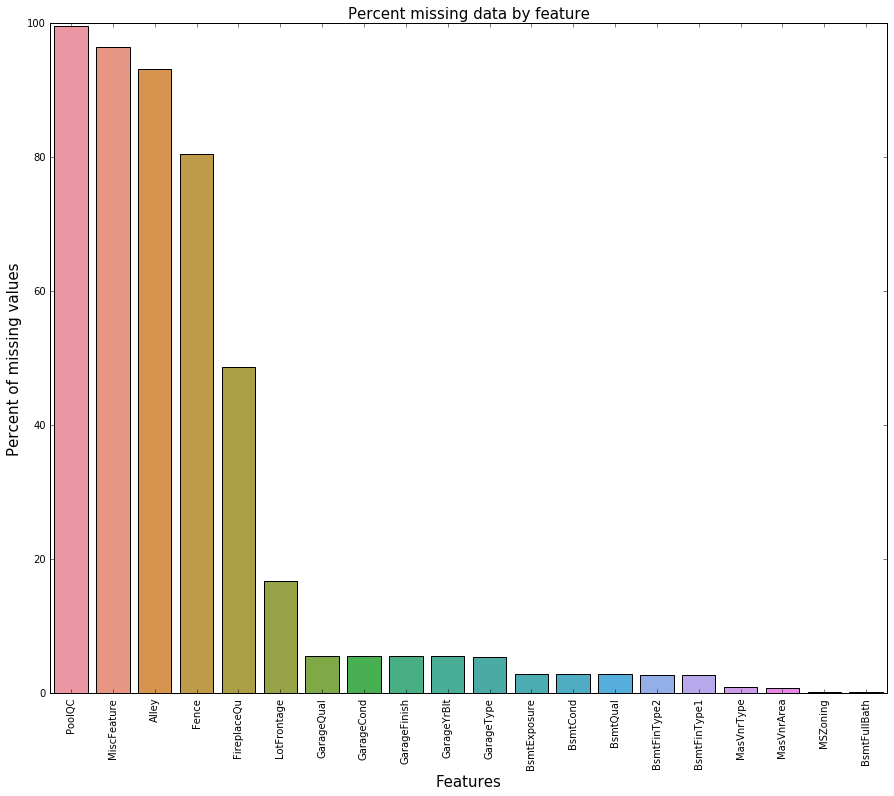

In [5]:
def getMissingValues(train,test,all_data):
    all_data_na = all_data.isnull().sum()/len(all_data)*100
    all_data_na = all_data_na[all_data_na != 0].sort_values(ascending=False)[:20]
    missing = pd.DataFrame({'Missing%':all_data_na})
    print missing.head(10)
    return all_data_na
    
    
#Plot
def plotMissing(missing):
    f, ax = plt.subplots(figsize=(15, 12))
    plt.xticks(rotation='90')
    sns.barplot(x=missing.index, y=missing)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)

missing = getMissingValues(train,test,all_data)
plotMissing(missing)

<b>Dropping features with more than 10% of the data missing<b>

              Missing%
GarageYrBlt   5.447071
GarageQual    5.447071
GarageFinish  5.447071
GarageCond    5.447071
GarageType    5.378554
BsmtCond      2.809181
BsmtExposure  2.809181
BsmtQual      2.774923
BsmtFinType2  2.740665
BsmtFinType1  2.706406


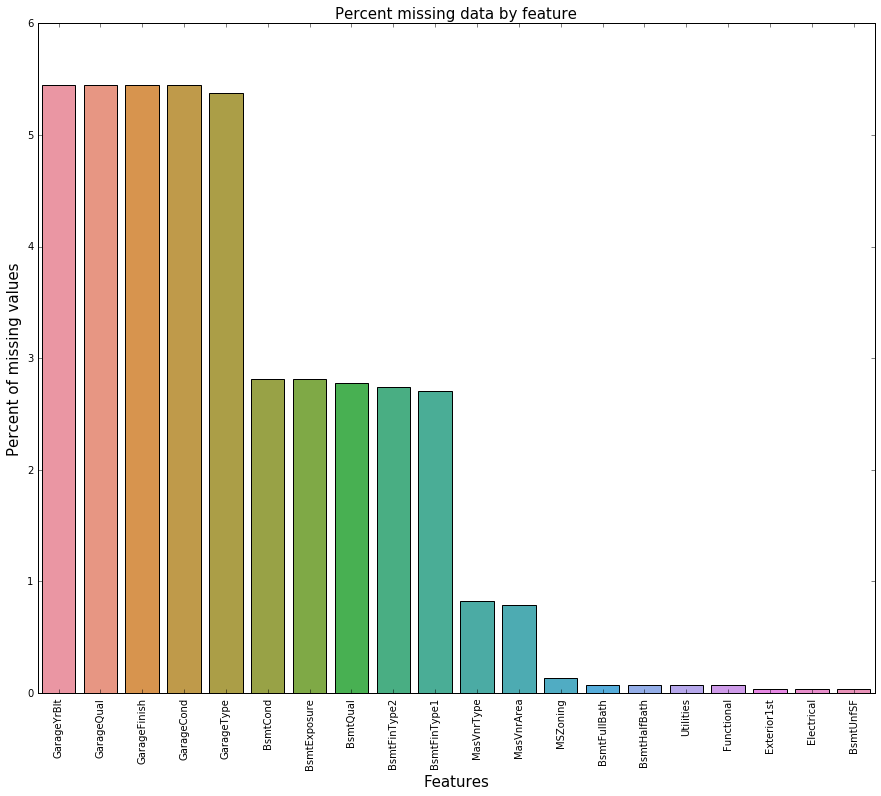

In [6]:
train = train.drop(labels=missing[missing>10.0].index,axis =1)
test = test.drop(labels=missing[missing>10.0].index,axis =1)
all_data = all_data.drop(labels=missing[missing>10.0].index,axis =1)

missing = getMissingValues(train,test,all_data)
plotMissing(missing)

<b>Imputing missing values<b>

In [7]:
train = train.apply(lambda x:x.fillna(x.value_counts().index[0]) if x.dtype == 'O' else x.fillna(x.mean()))
test = test.apply(lambda x:x.fillna(x.value_counts().index[0]) if x.dtype == 'O' else x.fillna(x.mean()))
all_data = all_data.apply(lambda x:x.fillna(x.value_counts().index[0]) if x.dtype == 'O' else x.fillna(x.mean()))
missing = getMissingValues(train,test,all_data)

Empty DataFrame
Columns: [Missing%]
Index: []


<b>Getting the most relevant columns using correlation<b>

In [8]:
# corrmat = train.select_dtypes(np.number).corr(train["SalePrice"])
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)

In [9]:
all_data = pd.get_dummies(all_data)
sp = train.loc[:,"SalePrice"]
train,test = all_data.loc[0:1459],all_data.loc[1460:]
train.loc[:,"SalePrice"] = sp
print train.shape,test.shape

(1460, 271) (1459, 270)


/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import RobustScaler

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


classifiers = {"Kernel Ridge" : KRR,"Elastic Net" : ENet,"Lasso" : lasso,"Gradient Boost":GBoost,
               "Extreme Gradient Boost":model_xgb,"Light gradient boost":model_lgb}

In [17]:
def rmsle_cv(model,train,n_folds):
    x_train,y_train = train.drop(["SalePrice"],axis=1),train.loc[:,"SalePrice"]
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [18]:
for clf_name,clf in classifiers.items():
    score = rmsle_cv(clf,train,5)
    print("\n{}: {.2f} ".format(clf_name,score.mean()))

AttributeError: 'numpy.float64' object has no attribute '2f'